# 개인과제-1: 트랜잭션 데이터로부터 직접 파생변수(feature) 만들기
- **Input**: transactions.csv (트랜잭션 형식의 판매 데이터)
- **Output**: features.csv (머신러닝 모델링이 가능한 형태의 고객 feature 데이터, 일명 *Customer Signature*)  

<span style="color:blue">**아래 코드를 참고하여 과제를 수행한 노트북화일(.ipynb)을 기한 내에 가상대학에 제출하기 바랍니다.**</span>  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

pd.set_option('max_columns', 20, 'max_rows', 20)

In [2]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

### Read Transactions

In [3]:
tr = pd.read_csv('transactions.csv', encoding='cp949')
tr

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000


*파생변수를 저장할 빈 리스트를 만든다.*

In [4]:
features = []

<br><font color='green'>
### Numeric Features

**[파생변수 1-4]** 총구매액, 구매건수, 평균구매액, 최대구매액

In [5]:
f = tr.groupby('cust_id')['amount'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()
features.append(f); f

,cust_id,총구매액,구매건수,평균구매액,최대구매액
0,0,68282840,74,922741,11264000
1,1,2136000,3,712000,2136000
2,2,3197000,4,799250,1639000
3,3,16077620,44,365400,4935000
4,4,29050000,3,9683333,24000000
...,...,...,...,...,...
3495,3495,3175200,2,1587600,3042900
3496,3496,29628600,13,2279123,7200000
3497,3497,75000,1,75000,75000
3498,3498,1875000,2,937500,1000000


C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Bohyeon Kim\Anaconda3\lib\site-package

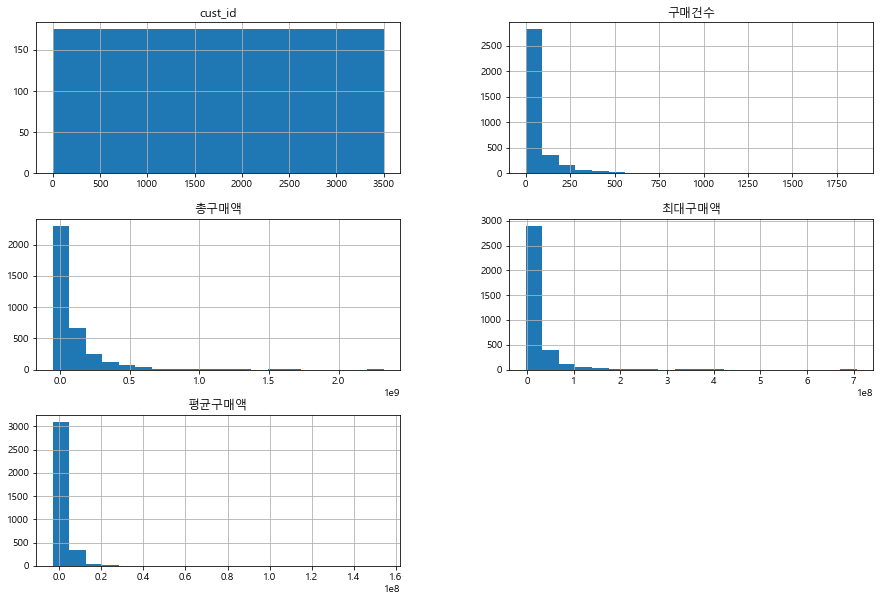

In [6]:
# histogram
f.hist(bins=20, figsize=(15,10))
plt.show()

**[파생변수 5-7]** 구매상품종류(goods_id, gds_grp_nm, gds_grp_mclas_nm 각각)

In [7]:
f = tr.groupby('cust_id').agg({
    'goods_id': [('구매상품종류1', lambda x: x.nunique())],
    'gds_grp_nm': [('구매상품종류2', lambda x: x.nunique())],
    'gds_grp_mclas_nm': [('구매상품종류3', lambda x: x.nunique())]
})

f.columns = f.columns.droplevel()  # 동일한 코드: f.columns = [j for _, j in f.columns]
f=f.reset_index()
features.append(f); f

,cust_id,구매상품종류1,구매상품종류2,구매상품종류3
0,0,35,28,17
1,1,2,2,2
2,2,1,2,2
3,3,24,20,13
4,4,2,3,3
...,...,...,...,...
3495,3495,1,2,2
3496,3496,9,7,5
3497,3497,1,1,1
3498,3498,1,1,1


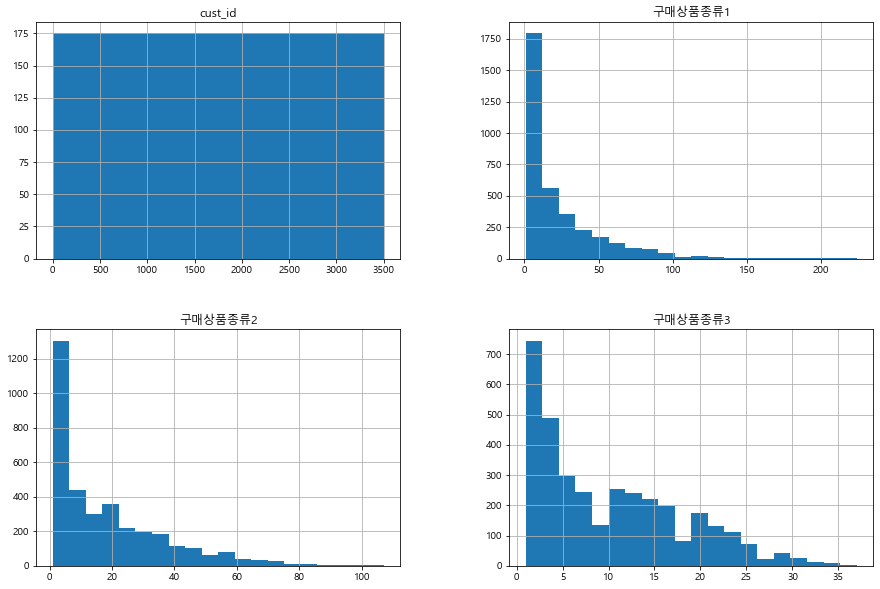

In [8]:
# histogram
f.hist(bins=20, figsize=(15,10))
plt.show()

**[파생변수 8-14]** 내점일수, 구매주기, 주말방문비율, 계절별 구매비율(Spring(3-5)/Summer(6-8)/Fall(9-11)/Winter(12-2))

In [9]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('내점일수',lambda x: x.str[:10].nunique()),
    ('구매주기', lambda x: int((x.astype('datetime64').max() - x.astype('datetime64').min()).days / x.str[:10].nunique())),
    ('주말방문비율', lambda x: np.mean(pd.to_datetime(x).dt.dayofweek>4)),
    ('봄-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([1,2,12])))
]).reset_index()
features.append(f); f

,cust_id,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,0,19,17,0.527027,0.094595,0.391892,0.378378,0.135135
1,1,2,1,0.000000,0.000000,0.000000,1.000000,0.000000
2,2,2,1,0.000000,0.000000,0.000000,0.000000,1.000000
3,3,18,16,0.318182,0.590909,0.159091,0.113636,0.136364
4,4,2,85,0.000000,0.333333,0.000000,0.666667,0.000000
...,...,...,...,...,...,...,...,...
3495,3495,1,0,1.000000,0.000000,1.000000,0.000000,0.000000
3496,3496,8,40,0.461538,0.076923,0.076923,0.461538,0.384615
3497,3497,1,0,0.000000,0.000000,0.000000,0.000000,1.000000
3498,3498,2,39,0.000000,0.500000,0.000000,0.000000,0.500000


**[파생변수 15-16]** 환불금액, 환불건수

In [10]:
f = tr[tr.amount < 0].groupby('cust_id')['amount'].agg([
    ('환불금액', lambda x: x.sum() * -1),
    ('환불건수', np.size)
]).reset_index()
features.append(f); f

,cust_id,환불금액,환불건수
0,0,6860000,3
1,1,300000,1
2,5,462000,1
3,6,4582000,3
4,7,29524000,4
...,...,...,...
1200,3488,529602320,13
1201,3489,3840000,1
1202,3493,9767000,2
1203,3496,6049600,1


**[파생변수 17-18]** 내점 당 구매액, 구매건수

In [11]:
# 내점 당 구매액 = 총구매액 / 내점일수
visits = tr.groupby('cust_id')['tran_date'].agg(lambda x: x.nunique())
f = (tr.groupby('cust_id')['amount'].sum() / visits).reset_index().rename(columns={0 : "내점당구매액"})
features.append(f); display(f)
f = (tr.groupby('cust_id')['amount'].size() / visits).reset_index().rename(columns={0 : "내점당구매건수"})
features.append(f); f

,cust_id,내점당구매액
0,0,3.593834e+06
1,1,1.068000e+06
2,2,1.598500e+06
3,3,8.932011e+05
4,4,1.452500e+07
...,...,...
3495,3495,3.175200e+06
3496,3496,3.703575e+06
3497,3497,7.500000e+04
3498,3498,9.375000e+05


,cust_id,내점당구매건수
0,0,3.894737
1,1,1.500000
2,2,2.000000
3,3,2.444444
4,4,1.500000
...,...,...
3495,3495,2.000000
3496,3496,1.625000
3497,3497,1.000000
3498,3498,1.000000


**[파생변수 19-24]** 최근 3개월, 6개월, 12개월 구매금액 및 구매건수

In [12]:
# pd.to_datetime(), pd.offsets.MonthBegin(3)
for m in [3,6,12]:
    start = str(pd.to_datetime(tr.tran_date.max()) - pd.offsets.MonthBegin(m))
    f = tr.query('tran_date >= @start').groupby('cust_id')['amount'].agg([
        (f'최근{m}개월_구매금액', np.sum), 
        (f'최근{m}개월_구매건수', np.size)
    ]).reset_index()
    display(f)
    features.append(f)

,cust_id,최근3개월_구매금액,최근3개월_구매건수
0,0,29084140,27
1,1,2136000,3
2,3,549620,4
3,4,27000000,2
4,7,140818200,36
...,...,...,...
2439,3492,9154000,1
2440,3493,42697460,101
2441,3494,82800000,2
2442,3496,12028000,7


,cust_id,최근6개월_구매금액,최근6개월_구매건수
0,0,42601240,61
1,1,2136000,3
2,3,1284060,11
3,4,27000000,2
4,6,2250000,2
...,...,...,...
2778,3492,9154000,1
2779,3493,59972640,140
2780,3494,82800000,2
2781,3496,19224000,11


,cust_id,최근12개월_구매금액,최근12개월_구매건수
0,0,68282840,74
1,1,2136000,3
2,2,3197000,4
3,3,16077620,44
4,4,29050000,3
...,...,...,...
3495,3495,3175200,2
3496,3496,29628600,13
3497,3497,75000,1
3498,3498,1875000,2


**[파생변수 25]** 구매추세 패턴

고객의 하루 구매내역에 얼마나 다양한 제품들이 있는지에 대한 내용

In [13]:
bt = tr.groupby(['cust_id','tran_date'])['gds_grp_mclas_nm'].agg([('구매내역','unique'),('구매추세',lambda x: 0)]).reset_index()
data = []
for custid in range(3500):
    df = bt[bt['cust_id']==custid]
    lst = [i for i in df['구매내역']]
    for i in lst:
        if len(i) == 1:
            for j in range(len(lst)):
                if i[0] in lst[j]:
                    df['구매추세'].iloc[j] += 1
        else:
            for j in range(len(lst)):
                k = 0
                while k != len(i):
                    if i[k] in lst[j]:
                        k += 1
                        if k == (len(i)-1):
                            df['구매추세'].iloc[j] += 1
                            break
                    else:
                        break
    data.append(df)
f = pd.concat(data).groupby('cust_id')['구매추세'].agg([('합계','sum'),('다양성','nunique')]).reset_index()
f['구매추세'] = f['다양성']/f['합계']
f = f[['cust_id','구매추세']]
display(f)

C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,cust_id,구매추세
0,0,0.098039
1,1,0.250000
2,2,0.250000
3,3,0.125000
4,4,0.500000
...,...,...
3495,3495,1.000000
3496,3496,0.093750
3497,3497,1.000000
3498,3498,0.250000


**[파생변수 26]** 가격 선호도

만원이하:4, 십만원이하:3, 백만원이하:2, 천만원이하:1, 천만원 이상:0을 기준으로 잡음

In [14]:
def pr(x):
    if abs(x) > 10000000:
        return '10000000'
    elif abs(x) >= 1000000:
        return '1000000'
    elif abs(x) >= 100000:
        return '100000'
    elif abs(x) >= 10000:
        return '10000'
    else:
        return '1000'
tr['price'] = tr['amount'].apply(pr)
p1 = pd.pivot_table(index='cust_id',columns='price',values='amount',data=tr,aggfunc='size',fill_value=0).reset_index()
p1['가격 선호도'] = 0
for i in range(p1.shape[0]):
    p1['가격 선호도'][i] = max(p1['10000000'][i],p1['1000000'][i],p1['100000'][i],p1['10000'][i],p1['1000'][i])
for i in range(p1.shape[0]):
    if p1['가격 선호도'][i] == p1['10000000'][i]:
        p1['가격 선호도'][i] = 0
    elif p1['가격 선호도'][i] == p1['1000000'][i]:
        p1['가격 선호도'][i] = 1
    elif p1['가격 선호도'][i] == p1['100000'][i]:
        p1['가격 선호도'][i] = 2
    elif p1['가격 선호도'][i] == p1['10000'][i]:
        p1['가격 선호도'][i] = 3
    else:
        p1['가격 선호도'][i] = 4
f = p1[['cust_id','가격 선호도']]
features.append(f)
display(f)

price,cust_id,가격 선호도
0,0,3
1,1,2
2,2,1
3,3,2
4,4,1
...,...,...
3495,3495,1
3496,3496,1
3497,3497,3
3498,3498,1


**[파생변수 27]** 시즌 선호도

구매건수가 가장 많은 계절을 나타냄 (봄:0, 여름:1, 가을:2, 겨울:3)

In [15]:
tr['month'] = tr['tran_date'].apply(lambda x: pd.to_datetime(x).month)
def season(x):
    if x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'
    else:
        return 'winter'
tr['season'] = tr['month'].apply(season)
s = pd.pivot_table(index='cust_id',columns='season',values='amount',data=tr,aggfunc='size',fill_value=0).reset_index()
s['시즌 선호도'] = 0
for i in range(s.shape[0]):
    s['시즌 선호도'][i] = max(s['fall'][i],s['spring'][i],s['summer'][i],s['winter'][i])
for i in range(s.shape[0]):
    if s['시즌 선호도'][i] == s['fall'][i]:
        s['시즌 선호도'][i] = 2
    elif s['시즌 선호도'][i] == s['spring'][i]:
        s['시즌 선호도'][i] = 0
    elif s['시즌 선호도'][i] == s['summer'][i]:
        s['시즌 선호도'][i] = 1
    else:
        s['시즌 선호도'][i] = 3
f = s[['cust_id','시즌 선호도']]
features.append(f)
display(f)

season,cust_id,시즌 선호도
0,0,1
1,1,2
2,2,3
3,3,0
4,4,2
...,...,...
3495,3495,1
3496,3496,2
3497,3497,3
3498,3498,0


**[파생변수 28]** 휴면(또는 이탈) 여부

6개월 동안 방문하지 않았으면 이탈으로 간주

In [16]:
def d(x):
    if len(x) == 2:
        if int(x[1]) > 6:
            result = int(x[1]) - int(x[0])
        else:
            result = 12 - int(x[1])
    else:
        result = 12 -int(x[0])
    if result >= 6:
        return 1
    else:
        return 0
d1 = tr.groupby('cust_id')['month'].agg([('구매일자','unique')]).reset_index()
d1['구매일자'] = d1['구매일자'].apply(lambda x: x[-2:])
d1['휴면(이탈) 여부'] = d1['구매일자'].apply(d)
f = d1.drop(columns=['구매일자'])
features.append(f)
display(f)

,cust_id,휴면(이탈) 여부
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
3495,3495,1
3496,3496,0
3497,3497,1
3498,3498,1


**[파생변수 29-58]** Top-10 베스트 셀러(gds_grp_mclas_nm)에 대한 구매 금액/건수/여부

In [17]:
best10 = list(tr.groupby('gds_grp_mclas_nm')['amount'].agg(
    [('베스트셀러','size')]).reset_index().sort_values('베스트셀러',ascending=False)[:10]['gds_grp_mclas_nm'])
for i in range(10):
    b1 = tr.query('gds_grp_mclas_nm == "'+best10[i]+'"')
    f = b1.groupby('cust_id')['amount'].agg([(best10[i]+' 구매 금액','sum'),(best10[i]+' 구매 건수','size')]).reset_index()
    f[best10[i]+' 구매 여부'] = 1
    display(f)
    features.append(f)

,cust_id,기타 구매 금액,기타 구매 건수,기타 구매 여부
0,0,507200,13,1
1,2,139000,2,1
2,3,396630,14,1
3,4,3000000,1,1
4,6,70000,1,1
...,...,...,...,...
2618,3490,136100,3,1
2619,3493,1047100,67,1
2620,3495,132300,1,1
2621,3496,423500,3,1


,cust_id,농산물 구매 금액,농산물 구매 건수,농산물 구매 여부
0,0,74360,3,1
1,3,1599380,6,1
2,7,2732200,6,1
3,8,96800,1,1
4,9,144800,4,1
...,...,...,...,...
1700,3486,2423300,4,1
1701,3487,448760,6,1
1702,3489,210000,1,1
1703,3493,16277360,112,1


,cust_id,가공식품 구매 금액,가공식품 구매 건수,가공식품 구매 여부
0,0,35520,1,1
1,3,1346550,6,1
2,7,490800,5,1
3,8,816500,19,1
4,9,161400,2,1
...,...,...,...,...
1992,3483,484480,7,1
1993,3487,1294050,10,1
1994,3493,930300,5,1
1995,3494,64000,1,1


,cust_id,축산가공 구매 금액,축산가공 구매 건수,축산가공 구매 여부
0,0,119000,2,1
1,3,45000,1,1
2,8,361000,3,1
3,9,2400,1,1
4,14,22150,3,1
...,...,...,...,...
1143,3476,30000,1,1
1144,3483,11390,3,1
1145,3486,1500,1,1
1146,3487,24500,4,1


,cust_id,수산품 구매 금액,수산품 구매 건수,수산품 구매 여부
0,0,866000,4,1
1,3,400560,5,1
2,7,4306000,9,1
3,8,110000,1,1
4,14,3479240,32,1
...,...,...,...,...
1651,3483,228800,2,1
1652,3487,175500,2,1
1653,3489,30000,1,1
1654,3493,799890,5,1


,cust_id,화장품 구매 금액,화장품 구매 건수,화장품 구매 여부
0,0,22450000,7,1
1,4,2050000,1,1
2,7,75770000,20,1
3,8,34650000,6,1
4,10,1936000,2,1
...,...,...,...,...
1609,3490,9475000,3,1
1610,3493,2250000,1,1
1611,3494,6375000,2,1
1612,3498,1875000,2,1


,cust_id,디자이너 구매 금액,디자이너 구매 건수,디자이너 구매 여부
0,0,11264000,4,1
1,5,9488000,3,1
2,7,111309800,11,1
3,8,468624000,9,1
4,10,134823000,7,1
...,...,...,...,...
1143,3486,71300000,6,1
1144,3487,4000000,1,1
1145,3488,-20409600,32,1
1146,3490,251560000,13,1


,cust_id,시티웨어 구매 금액,시티웨어 구매 건수,시티웨어 구매 여부
0,0,9806000,7,1
1,5,1800000,1,1
2,6,6970000,5,1
3,7,2089500,1,1
4,8,6216000,1,1
...,...,...,...,...
1401,3490,2460000,2,1
1402,3491,2890000,1,1
1403,3492,10741000,2,1
1404,3496,14350500,7,1


,cust_id,일용잡화 구매 금액,일용잡화 구매 건수,일용잡화 구매 여부
0,3,385900,2,1
1,7,511500,3,1
2,10,63750,1,1
3,14,1744600,8,1
4,15,7912900,61,1
...,...,...,...,...
1234,3480,850000,2,1
1235,3483,227350,2,1
1236,3487,521600,3,1
1237,3491,1242800,3,1


,cust_id,육류 구매 금액,육류 구매 건수,육류 구매 여부
0,0,567860,10,1
1,3,237000,2,1
2,7,300000,3,1
3,14,707730,3,1
4,15,2650000,1,1
...,...,...,...,...
1158,3479,50000,1,1
1159,3481,120000,1,1
1160,3482,116820,2,1
1161,3487,250000,1,1


<br><font color='green'>
### Categorical Features

**[파생변수 59]** 주구매 상품: 가장 많이 구매한 상품(gds_grp_mclas_nm)

In [18]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([
    ('주구매상품', lambda x: x.value_counts().index[0])
]).reset_index()
features.append(f); f

,cust_id,주구매상품
0,0,기타
1,1,스포츠
2,2,남성 캐주얼
3,3,기타
4,4,보석
...,...,...
3495,3495,기타
3496,3496,시티웨어
3497,3497,주방용품
3498,3498,화장품


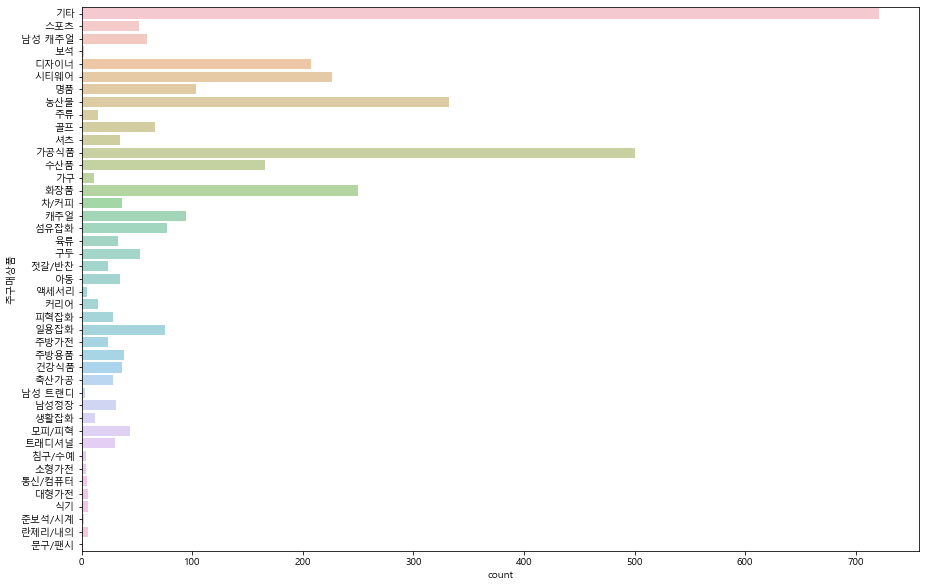

In [19]:
# 범주형 속성 값의 빈도 출력
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y='주구매상품', data=f, alpha=0.5)

**[파생변수 60]** 주구매 지점

In [20]:
f = tr.groupby('cust_id')['store_nm'].agg([
    ('주구매지점', lambda x: x.value_counts().index[0])
]).reset_index()
features.append(f)
display(f)

,cust_id,주구매지점
0,0,강남점
1,1,잠실점
2,2,관악점
3,3,광주점
4,4,본 점
...,...,...
3495,3495,본 점
3496,3496,부산본점
3497,3497,창원점
3498,3498,본 점


**[파생변수 61]** 상품별 구매순서

처음순서로 많이 구매하는 상품을 나타내

In [21]:
od = tr.groupby(['cust_id','tran_date'])['gds_grp_mclas_nm'].agg('unique').reset_index()
od['gds_grp_mclas_nm'] = od['gds_grp_mclas_nm'].apply(lambda x: x[0])
f = od.groupby('cust_id')['gds_grp_mclas_nm'].agg([('상품별 구매순서',max)]).reset_index()
features.append(f)
display(f)

,cust_id,상품별 구매순서
0,0,화장품
1,1,스포츠
2,2,남성 캐주얼
3,3,캐주얼
4,4,화장품
...,...,...
3495,3495,골프
3496,3496,시티웨어
3497,3497,주방용품
3498,3498,화장품


<br><font color='red'>
**[파생변수 62-70]** 추가로 새로운 파생변수를 제안하고 구현해야 함! 

**[파생변수 62]** 가장 많이 구매하는 상품이 다른 상품들과 함께 구매되는지 여부

In [22]:
a = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([('주구매상품',lambda x:x.value_counts().index[0])]
                                                 ).reset_index()[['cust_id','주구매상품']]
b = tr.groupby(['cust_id','tran_date'])['gds_grp_mclas_nm'].agg([('내역','unique')]).reset_index()
c = pd.merge(b,a,how='left')
c['여부1'] = 0
for i in range(len(c)):
    if c['주구매상품'][i] in c['내역'][i]:
        c['여부1'][i] = 1
c['여부2'] = 0
for i in range(c.shape[0]):
    if c['여부1'][i] == 1:
        if len(c['내역'][i]) == 1:
            c['여부2'][i] = 1
c['여부3'] = 0
for i in range(c.shape[0]):
    if c['여부1'][i] == 1:
        if c['여부1'][i] == c['여부2'][i]:
            c['여부3'][i] = 1
f = c[['cust_id','여부3']]
features.append(f)
display(f)

C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,cust_id,여부3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
67383,3499,0
67384,3499,0
67385,3499,0
67386,3499,0


**[파생변수 63]** 구매를 가장 많이 하는 월

In [23]:
f = tr.groupby('cust_id')['month'].agg([('구매건수가 많은 달',lambda x: x.value_counts().index[0])]).reset_index()
features.append(f)
display(f)

,cust_id,구매건수가 많은 달
0,0,10
1,1,10
2,2,1
3,3,3
4,4,11
...,...,...
3495,3495,6
3496,3496,12
3497,3497,1
3498,3498,1


**[파생변수 64]** 구매를 가장 많이 하는 계절

In [24]:
f = tr.groupby('cust_id')['season'].agg([('구매건수가 많은 계절',lambda x: x.value_counts().index[0])]).reset_index()
features.append(f)
display(f)

,cust_id,구매건수가 많은 계절
0,0,summer
1,1,fall
2,2,winter
3,3,spring
4,4,fall
...,...,...
3495,3495,summer
3496,3496,fall
3497,3497,winter
3498,3498,winter


**[파생변수 65-70]** 일자별 평균 구매금액 및 구매건수

In [25]:
def days(x):
    if int(x[8:10]) <= 10:
        return '월초'
    elif int(x[8:10]) <= 20:
        return '월중반'
    else:
        return '월말'
tr['days'] = tr['tran_date'].apply(days)
f = pd.pivot_table(columns='days',index='cust_id',values='amount',data=tr,aggfunc='mean',fill_value=0).reset_index()
features.append(f)
display(f)
f = pd.pivot_table(columns='days',index='cust_id',values='amount',data=tr,aggfunc='size',fill_value=0).reset_index()
features.append(f)
display(f)

days,cust_id,월말,월중반,월초
0,0,1.032426e+06,6.464486e+05,1.113962e+06
1,1,7.120000e+05,0.000000e+00,0.000000e+00
2,2,0.000000e+00,0.000000e+00,7.992500e+05
3,3,3.839627e+05,2.796327e+05,4.023456e+05
4,4,2.050000e+06,1.350000e+07,0.000000e+00
...,...,...,...,...
3495,3495,1.587600e+06,0.000000e+00,0.000000e+00
3496,3496,0.000000e+00,2.442371e+06,2.088667e+06
3497,3497,0.000000e+00,0.000000e+00,7.500000e+04
3498,3498,0.000000e+00,8.750000e+05,1.000000e+06


days,cust_id,월말,월중반,월초
0,0,13,28,33
1,1,3,0,0
2,2,0,0,4
3,3,15,11,18
4,4,1,2,0
...,...,...,...,...
3495,3495,2,0,0
3496,3496,0,7,6
3497,3497,0,0,1
3498,3498,0,1,1


**[파생변수 71-84]** 요일별 평균 구매금액 및 구매건수

In [26]:
def fw(x):
    return(('월', '화', '수', '목', '금', '토', '일')[pd.to_datetime(x).weekday()])
tr['요일'] = tr['tran_date'].apply(fw)
f = pd.pivot_table(columns='요일',index='cust_id',values='amount',data=tr,aggfunc='mean',fill_value=0).reset_index()
features.append(f)
display(f)
f = pd.pivot_table(columns='요일',index='cust_id',values='amount',data=tr,aggfunc='size',fill_value=0).reset_index()
features.append(f)
display(f)

요일,cust_id,금,목,수,월,일,토,화
0,0,1.890756e+06,610200.0,-3.647033e+05,4.124400e+05,2.338358e+06,6.281607e+05,2.243000e+06
1,1,0.000000e+00,918000.0,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
2,2,0.000000e+00,0.0,7.417500e+05,8.567500e+05,0.000000e+00,0.000000e+00,0.000000e+00
3,3,5.003333e+05,1081024.0,1.915167e+05,5.030800e+04,1.053580e+06,6.200000e+04,1.768145e+05
4,4,0.000000e+00,0.0,1.350000e+07,2.050000e+06,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
3495,3495,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.587600e+06,0.000000e+00,0.000000e+00
3496,3496,7.200000e+06,3348000.0,0.000000e+00,3.204600e+06,-6.049600e+06,3.355020e+06,6.008333e+05
3497,3497,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+04
3498,3498,0.000000e+00,1000000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.750000e+05


요일,cust_id,금,목,수,월,일,토,화
0,0,9,6,12,6,12,27,2
1,1,0,2,0,1,0,0,0
2,2,0,0,2,2,0,0,0
3,3,3,5,6,5,5,9,11
4,4,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...
3495,3495,0,0,0,0,2,0,0
3496,3496,1,2,0,1,1,5,3
3497,3497,0,0,0,0,0,0,1
3498,3498,0,1,0,0,0,0,1


### Merge & Save Features
- NA이면 적절한 값으로 대체하는 코드를 작성해야 함!
- 아래 코드를 수행하면 생성한 모든 파생변수가 병합되고 CSV 화일로 만들어진다.

In [27]:
data = pd.DataFrame({'cust_id': tr.cust_id.unique()})
for f in features :
    data = pd.merge(data, f, how='left')
display(data)
data.to_csv('features.csv', index=False, encoding='cp949')
data.info()

C:\Users\Bohyeon Kim\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1089: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,...,월말,월중반,월초,금,목,수,월,일,토,화
0,0,68282840,74,922741,11264000,35,28,17,19,17,...,1.032426e+06,6.464486e+05,1.113962e+06,1.890756e+06,610200.0,-3.647033e+05,4.124400e+05,2.338358e+06,6.281607e+05,2243000.0
1,0,68282840,74,922741,11264000,35,28,17,19,17,...,1.032426e+06,6.464486e+05,1.113962e+06,1.890756e+06,610200.0,-3.647033e+05,4.124400e+05,2.338358e+06,6.281607e+05,2243000.0
2,0,68282840,74,922741,11264000,35,28,17,19,17,...,1.032426e+06,6.464486e+05,1.113962e+06,1.890756e+06,610200.0,-3.647033e+05,4.124400e+05,2.338358e+06,6.281607e+05,2243000.0
3,0,68282840,74,922741,11264000,35,28,17,19,17,...,1.032426e+06,6.464486e+05,1.113962e+06,1.890756e+06,610200.0,-3.647033e+05,4.124400e+05,2.338358e+06,6.281607e+05,2243000.0
4,0,68282840,74,922741,11264000,35,28,17,19,17,...,1.032426e+06,6.464486e+05,1.113962e+06,1.890756e+06,610200.0,-3.647033e+05,4.124400e+05,2.338358e+06,6.281607e+05,2243000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67383,3499,263101550,92,2859799,34632000,48,40,20,38,8,...,2.793673e+06,2.161606e+06,4.097312e+06,4.231822e+06,4586500.0,2.909673e+06,3.097636e+06,1.995302e+06,2.560292e+06,238400.0
67384,3499,263101550,92,2859799,34632000,48,40,20,38,8,...,2.793673e+06,2.161606e+06,4.097312e+06,4.231822e+06,4586500.0,2.909673e+06,3.097636e+06,1.995302e+06,2.560292e+06,238400.0
67385,3499,263101550,92,2859799,34632000,48,40,20,38,8,...,2.793673e+06,2.161606e+06,4.097312e+06,4.231822e+06,4586500.0,2.909673e+06,3.097636e+06,1.995302e+06,2.560292e+06,238400.0
67386,3499,263101550,92,2859799,34632000,48,40,20,38,8,...,2.793673e+06,2.161606e+06,4.097312e+06,4.231822e+06,4586500.0,2.909673e+06,3.097636e+06,1.995302e+06,2.560292e+06,238400.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67388 entries, 0 to 67387
Data columns (total 74 columns):
cust_id        67388 non-null int64
총구매액           67388 non-null int64
구매건수           67388 non-null int64
평균구매액          67388 non-null int64
최대구매액          67388 non-null int64
구매상품종류1        67388 non-null int64
구매상품종류2        67388 non-null int64
구매상품종류3        67388 non-null int64
내점일수           67388 non-null int64
구매주기           67388 non-null int64
주말방문비율         67388 non-null float64
봄-구매비율         67388 non-null float64
여름-구매비율        67388 non-null float64
가을-구매비율        67388 non-null float64
겨울-구매비율        67388 non-null float64
환불금액           45746 non-null float64
환불건수           45746 non-null float64
내점당구매액         67388 non-null float64
내점당구매건수        67388 non-null float64
최근3개월_구매금액     64768 non-null float64
최근3개월_구매건수     64768 non-null float64
최근6개월_구매금액     66088 non-null float64
최근6개월_구매건수     66088 non-null float64
최근12개월_구매금액    67388 non-null int64
최

# End